In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from IPython.display import Audio
import speech_recognition as sr
import pyttsx3 
import tempfile
import warnings
# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
# warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# Paths for data.
Ravdess = "C:\\Users\\DAXESH MAHERIYA\\OneDrive\\Desktop\\Sem-2\\Project\\rev"
Crema = "C:\\Users\\mitpa\\OneDrive\\Desktop\\hrs\\sem 2 project\\Crema"
Tess = "C:\\Users\\mitpa\\OneDrive\\Desktop\hrs\\sem 2 project\\Tess"
Savee = "C:\\Users\\mitpa\\OneDrive\\Desktop\\hrs\\sem 2 project\\Savee"

# Ravdess

In [3]:

# Load dataset
paths = []
labels = []
for root, dirs, files in os.walk(r"C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-2\Project\rev"):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            # Extract emotion label from the filename
            emotion = file.split("-")[2]
            labels.append(emotion)
            paths.append(file_path)
    if len(paths) == 1440:
        break
print('Dataset is Loaded')


Dataset is Loaded


In [4]:
# Create DataFrame
df = pd.DataFrame()

df['Emotions'] = labels
df['Path'] = paths

In [5]:
df

Emotions                                               Path
0          01  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
1          01  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
2          01  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
3          01  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
4          02  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
...       ...                                                ...
1435       08  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
1436       08  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
1437       08  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
1438       08  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
1439       08  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...

[1440 rows x 2 columns]

In [6]:
l = LabelEncoder()
df.Emotions=l.fit_transform(df.Emotions)

In [7]:
l1 = dict(zip(l.classes_,l.transform(l.classes_)))
l1

{'01': 0, '02': 1, '03': 2, '04': 3, '05': 4, '06': 5, '07': 6, '08': 7}

In [8]:
value_to_string = {
    0: 'neutral',
    1: 'calm',
    2: 'happy',
    3: 'sad',
    4: 'angry',
    5: 'fear',
    6: 'disgust',
    7:'surprise'
}

In [9]:
df['Emotions'] = df['Emotions'].map(value_to_string)


In [10]:
df

Emotions                                               Path
0      neutral  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
1      neutral  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
2      neutral  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
3      neutral  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
4         calm  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
...        ...                                                ...
1435  surprise  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
1436  surprise  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
1437  surprise  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
1438  surprise  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
1439  surprise  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...

[1440 rows x 2 columns]

#### TESS

In [11]:

file_path = []
file_emotion = []
for dirname, _, filenames in os.walk("C:\\Users\\DAXESH MAHERIYA\\OneDrive\\Desktop\\Sem-2\\Project\\SER dataset"):
                                      # "C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Project\SER dataset"
    for filename in filenames:
        file_path.append(os.path.join(dirname, filename))
#         print(paths)
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        
        if label=='ps':
            file_emotion.append('surprise')
        else:
        
             file_emotion.append(label.lower())
    if len(file_path) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [12]:
## Create a dataframe
df1 = pd.DataFrame()

df1['Emotions'] = file_emotion
df1['Path'] = file_path
df1.head()

Emotions                                               Path
0    angry  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
1    angry  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
2    angry  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
3    angry  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
4    angry  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...

In [13]:
# creating Dataframe using all the 4 dataframes we created so far.
df = pd.concat([df, df1,], axis = 0)
df.to_csv("data_path.csv",index=False)
df.head()

Emotions                                               Path
0  neutral  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
1  neutral  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
2  neutral  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
3  neutral  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...
4     calm  C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Sem-...

# Data Visualisation and Exploration

<Axes: xlabel='Emotions', ylabel='count'>

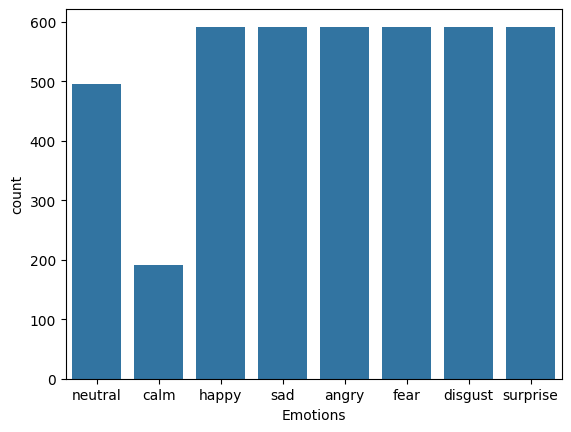

In [14]:
sns.countplot(data=df, x='Emotions')

In [15]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr,color='blue')
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

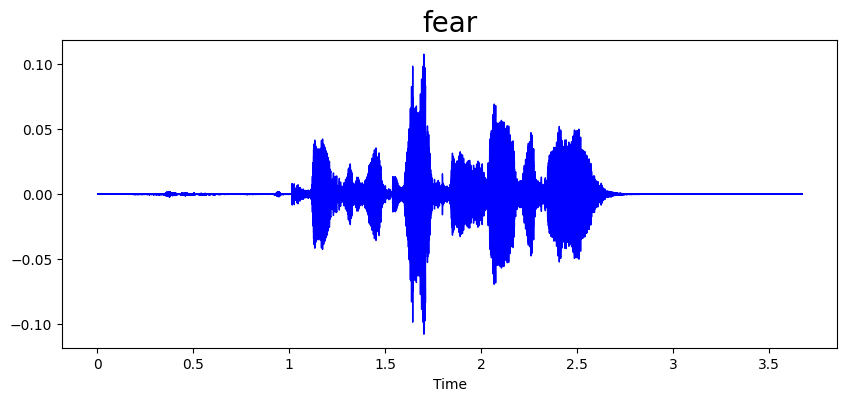

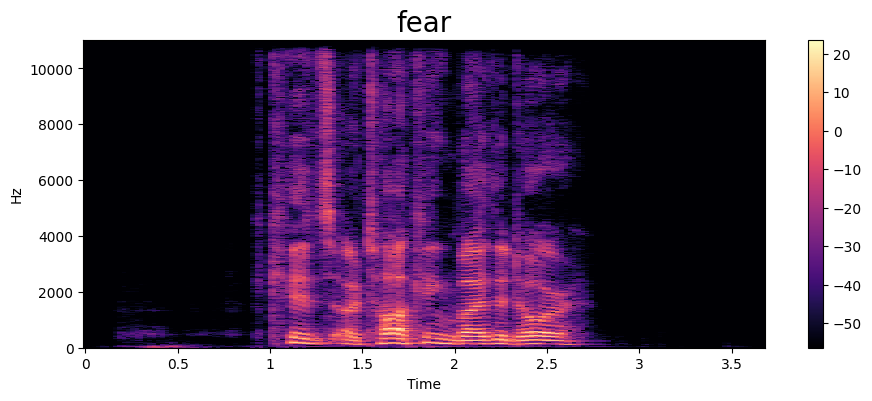

In [16]:
emotion = 'fear'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

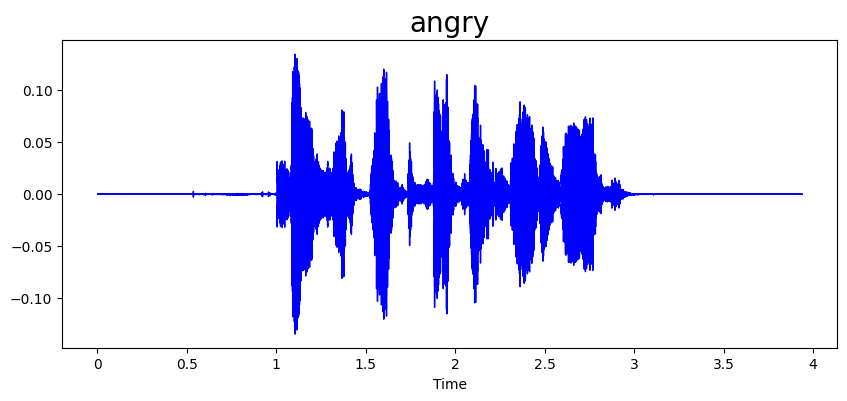

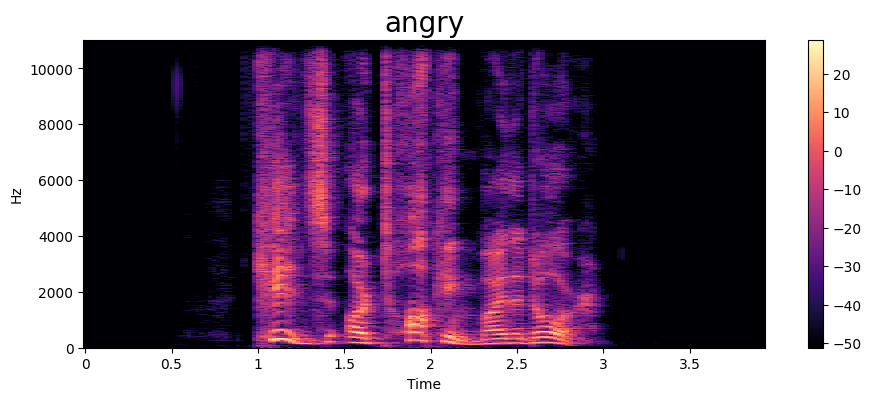

In [17]:
emotion = 'angry'
path = np.array(df['Path'][df['Emotions']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

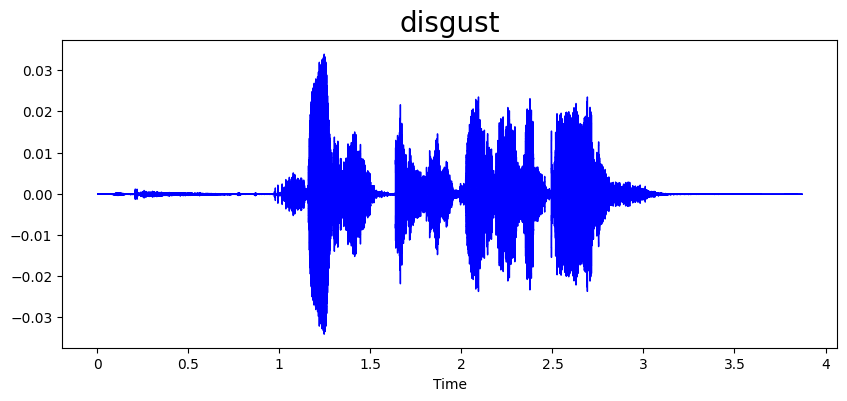

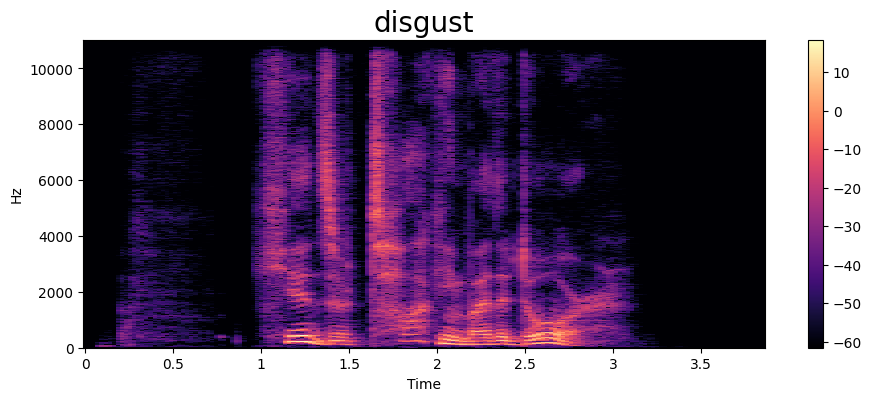

In [18]:
emotion = 'disgust'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

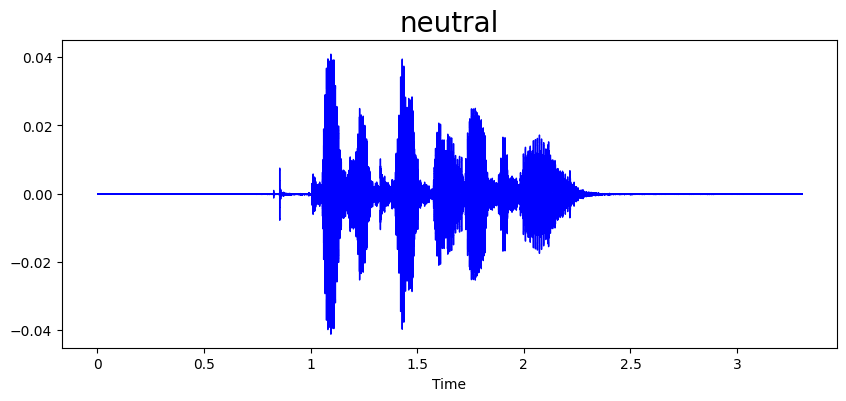

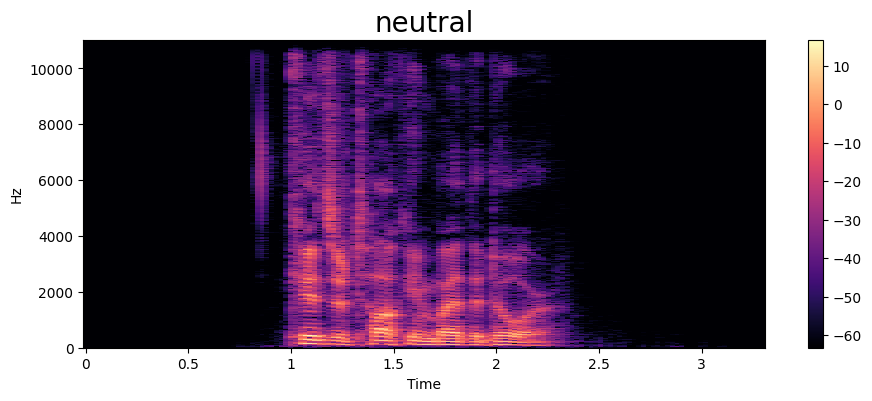

In [19]:
emotion = 'neutral'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

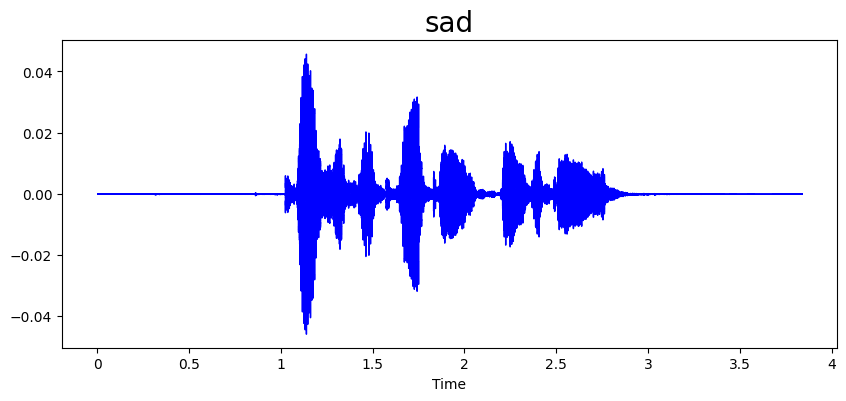

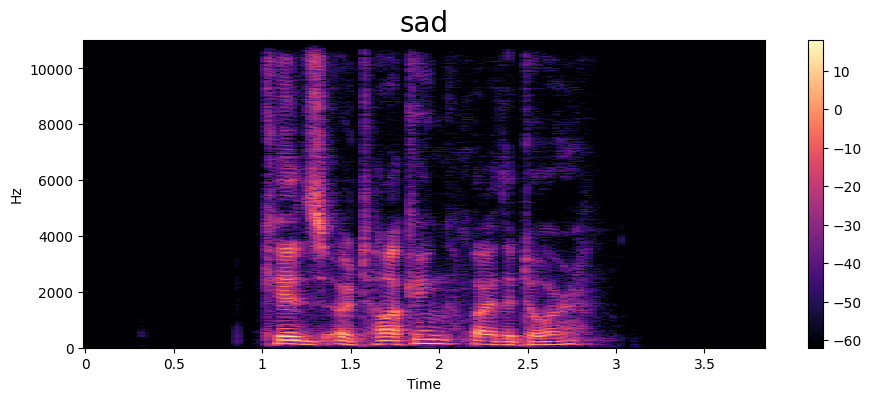

In [20]:
emotion = 'sad'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

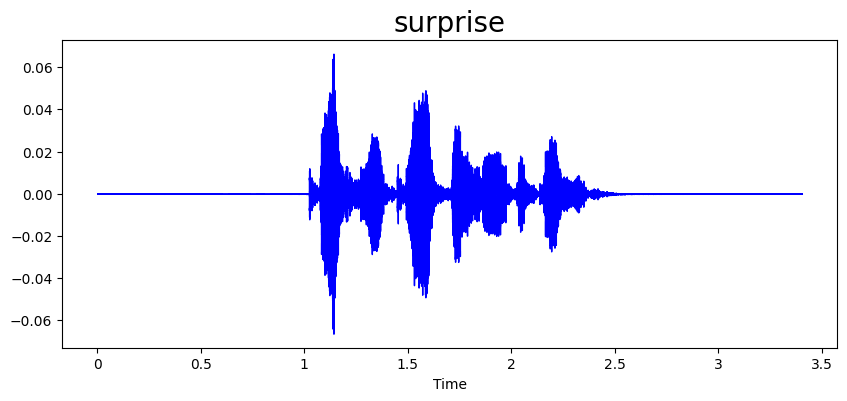

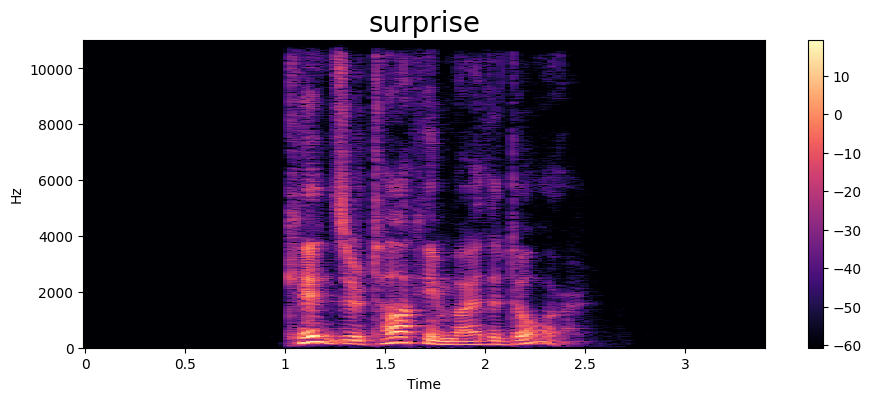

In [21]:
emotion = 'surprise'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

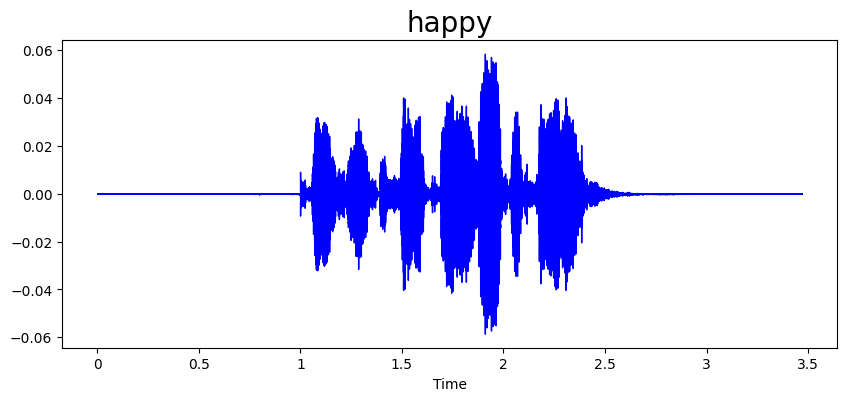

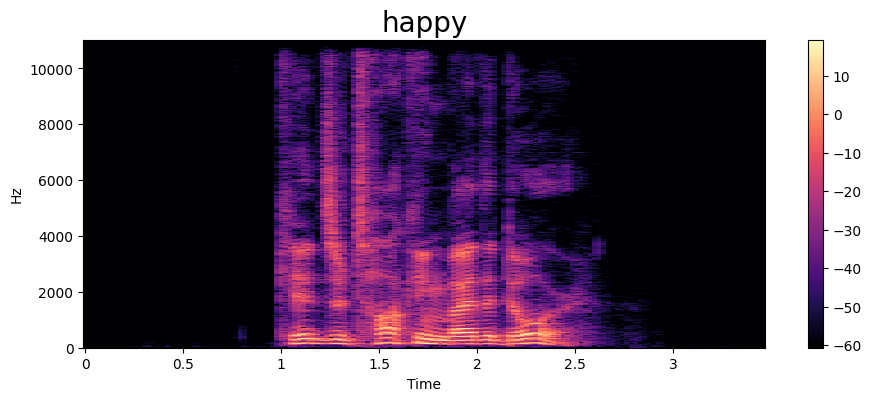

In [22]:
emotion = 'happy'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

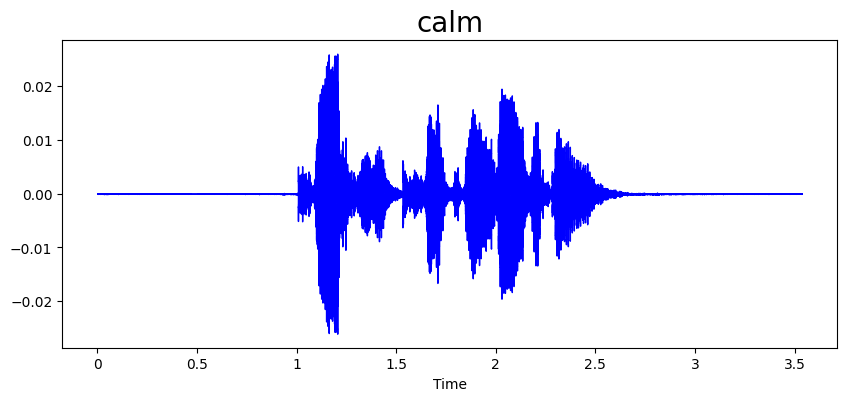

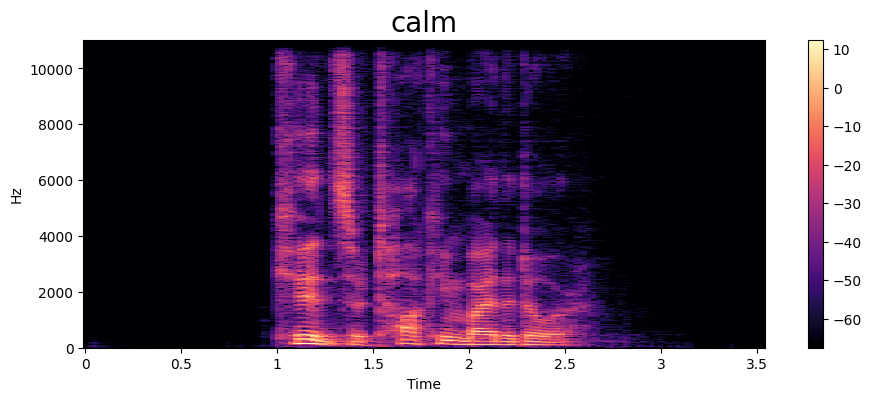

In [23]:
emotion = 'calm'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [25]:
l = LabelEncoder()
l.fit_transform(df.Emotions)

array([5, 5, 5, ..., 6, 6, 6])

In [26]:
l1 = dict(zip(l.classes_,l.transform(l.classes_)))
l1

{'angry': 0,
 'calm': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprise': 7}

In [27]:
value_to_string = {
 'angry': 0,
 'calm': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprise': 7

}

In [28]:
# Function to extract MFCC features from audio file
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [29]:
# Extract MFCC features
X_mfcc = df['Path'].apply(lambda x: extract_mfcc(x))
X = [x for x in X_mfcc]
X = np.array(X)
df['Emotions'] = df['Emotions'].map(value_to_string)
y = df['Emotions']

In [30]:
# Split data into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
X[0]

array([-6.7019543e+02,  6.5063850e+01,  8.8895434e-01,  1.4715979e+01,
        9.1821651e+00,  6.6057467e-01, -3.8468361e+00, -3.5839460e+00,
       -1.2959006e+01, -3.3001330e+00,  9.1077960e-01, -3.5970354e+00,
        2.3762746e+00, -4.3889413e+00,  5.4508024e-01,  8.9185166e-01,
       -4.8025908e+00, -2.1054139e+00, -1.6059692e+00, -1.0523902e+00,
       -7.0672808e+00, -6.2306100e-01, -2.7280300e+00, -5.3073611e+00,
       -1.9691168e+00, -9.4615275e-01, -5.7211108e+00,  3.3299112e-01,
       -2.5438452e+00,  1.8220834e-01, -2.3510973e+00, -2.5047269e+00,
       -3.1515074e+00, -2.1908991e+00, -3.8017602e+00, -1.8130877e+00,
       -1.2612222e+00, -2.1449544e+00, -4.1521730e+00, -1.7796155e+00],
      dtype=float32)

In [31]:
from sklearn.svm import SVC 

In [32]:
# # Train SVM model
model = SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain, ytrain)

SVC(C=1, gamma='auto', kernel='poly')

In [33]:
# Predict on test set
ypred = model.predict(xtest)

In [34]:
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.8455188679245284


In [35]:
from sklearn.metrics import confusion_matrix,classification_report

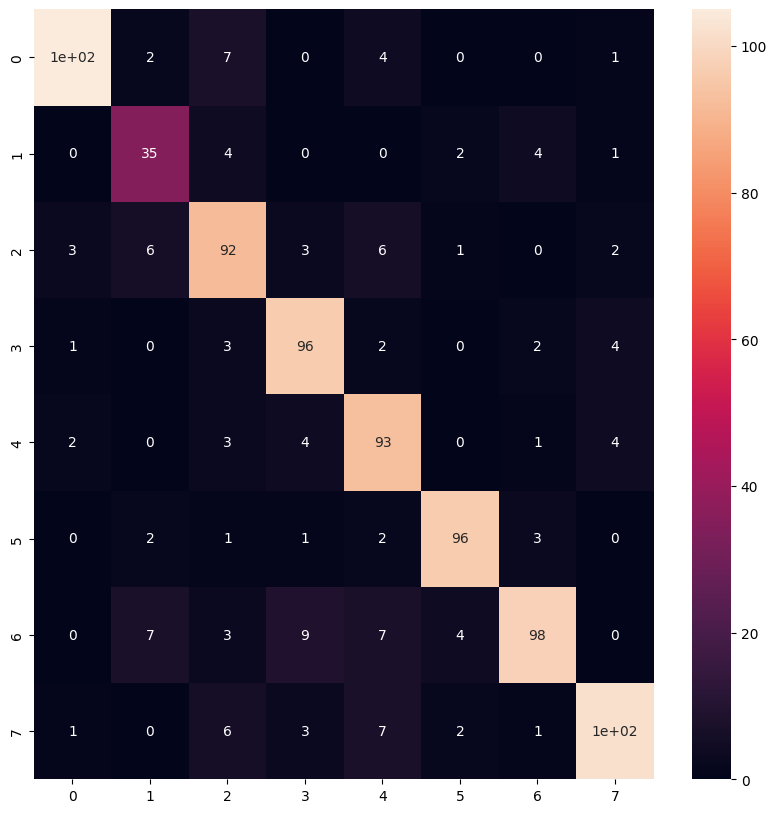

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(ytest, ypred),annot=True)
plt.show()

In [37]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       119
           1       0.67      0.76      0.71        46
           2       0.77      0.81      0.79       113
           3       0.83      0.89      0.86       108
           4       0.77      0.87      0.82       107
           5       0.91      0.91      0.91       105
           6       0.90      0.77      0.83       128
           7       0.89      0.84      0.86       122

    accuracy                           0.85       848
   macro avg       0.84      0.84      0.84       848
weighted avg       0.85      0.85      0.85       848



0.7806603773584906
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       119
           1       0.55      0.76      0.64        46
           2       0.79      0.74      0.77       113
           3       0.74      0.81      0.77       108
           4       0.76      0.76      0.76       107
           5       0.85      0.88      0.86       105
           6       0.91      0.75      0.82       128
           7       0.78      0.72      0.75       122

    accuracy                           0.78       848
   macro avg       0.77      0.78      0.77       848
weighted avg       0.79      0.78      0.78       848



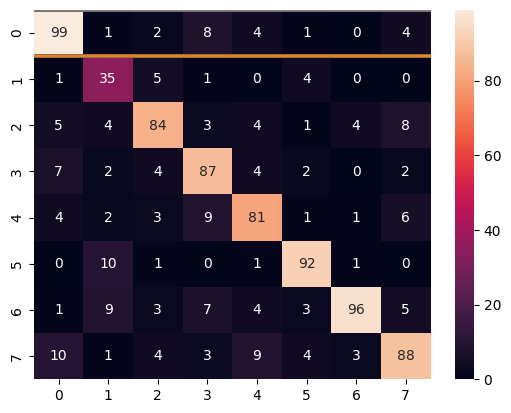

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

K=KNeighborsClassifier(n_neighbors=5)
K.fit(xtrain, ytrain)
ypreda=K.predict(xtest)
print(accuracy_score(ytest,ypreda))
sns.heatmap(confusion_matrix(ytest,ypreda),annot=True)
print(classification_report(ytest,ypreda))

error=[]
for i in range(0,11):
    error.append(ypreda!=ytest)
plt.plot(range(0,11),error)
plt.show()

0.7547169811320755
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       119
           1       0.60      0.52      0.56        46
           2       0.70      0.75      0.72       113
           3       0.73      0.79      0.76       108
           4       0.64      0.71      0.68       107
           5       0.80      0.89      0.84       105
           6       0.84      0.72      0.77       128
           7       0.80      0.80      0.80       122

    accuracy                           0.75       848
   macro avg       0.74      0.74      0.74       848
weighted avg       0.76      0.75      0.75       848



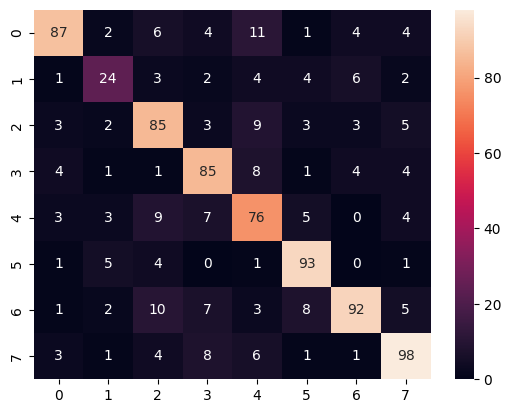

In [39]:
DT=DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
DT.fit(xtrain, ytrain)
ypredi=DT.predict(xtest)
print(accuracy_score(ytest,ypredi))
sns.heatmap(confusion_matrix(ytest,ypredi),annot=True)
print(classification_report(ytest,ypredi))

In [40]:
# plt.figure(figsize=(20,20))
# plot_tree(DT)
# plt.show()

0.8337264150943396
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       119
           1       0.69      0.91      0.79        46
           2       0.78      0.86      0.82       113
           3       0.82      0.82      0.82       108
           4       0.92      0.75      0.82       107
           5       0.95      0.90      0.93       105
           6       0.87      0.78      0.82       128
           7       0.79      0.85      0.82       122

    accuracy                           0.83       848
   macro avg       0.83      0.84      0.83       848
weighted avg       0.84      0.83      0.83       848



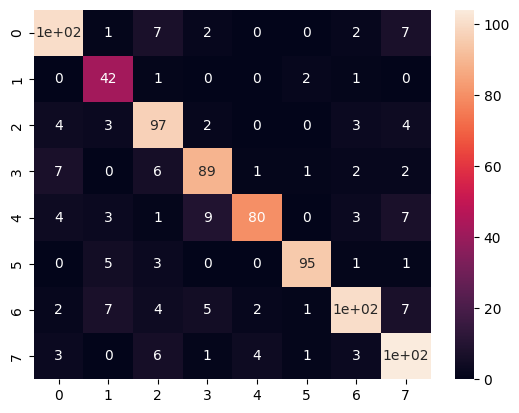

In [41]:
RF=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
RF.fit(xtrain, ytrain)
ypredic=RF.predict(xtest)
print(accuracy_score(ytest,ypredic))
sns.heatmap(confusion_matrix(ytest,ypredic),annot=True)
print(classification_report(ytest,ypredic))

In [42]:
# Initialize the recognizer 
r = sr.Recognizer()

In [94]:
r = sr.Recognizer()
def SpeakText(command):
    engine = pyttsx3.init()
    engine.say(command) 
    engine.runAndWait()
def classify_emotion():
    try:
        with sr.Microphone() as source:
            r.adjust_for_ambient_noise(source, duration=0.5)
            print("Listening...")
            audio = r.listen(source, timeout=3)
            print("Processing...")

            with tempfile.NamedTemporaryFile(delete=False) as tmpfile:
                tmpfile.write(audio.get_wav_data())
                tmpfile_name = tmpfile.name

            mfcc_features = extract_mfcc(tmpfile_name)
            mfcc_features = np.array(mfcc_features).reshape(1, -1)

            predicted_label_index = model.predict(mfcc_features)[0]
            label_mapping = {0: 'neutral',1: 'calm',2: 'happy',3: 'sad', 4: 'angry', 5: 'fear',6: 'disgust',7:'ps'}
            predicted_label = label_mapping[predicted_label_index]

            print("Predicted emotion:", predicted_label)

            text = r.recognize_google(audio)
            text = text.lower()
            print("You said:", text)
            SpeakText(text)

            os.remove(tmpfile_name)

            return predicted_label
    except sr.RequestError as e:
        print("Could not request results; {0}".format(e))
    except sr.UnknownValueError:
        print("Unknown error occurred")
def main():
    classify_emotion()
if __name__ == "__main__":
    main()

Listening...
Processing...
Predicted emotion: ps
You said: leo maro
